# **Exploratory Data Analysis on US Real Estate**
<div>
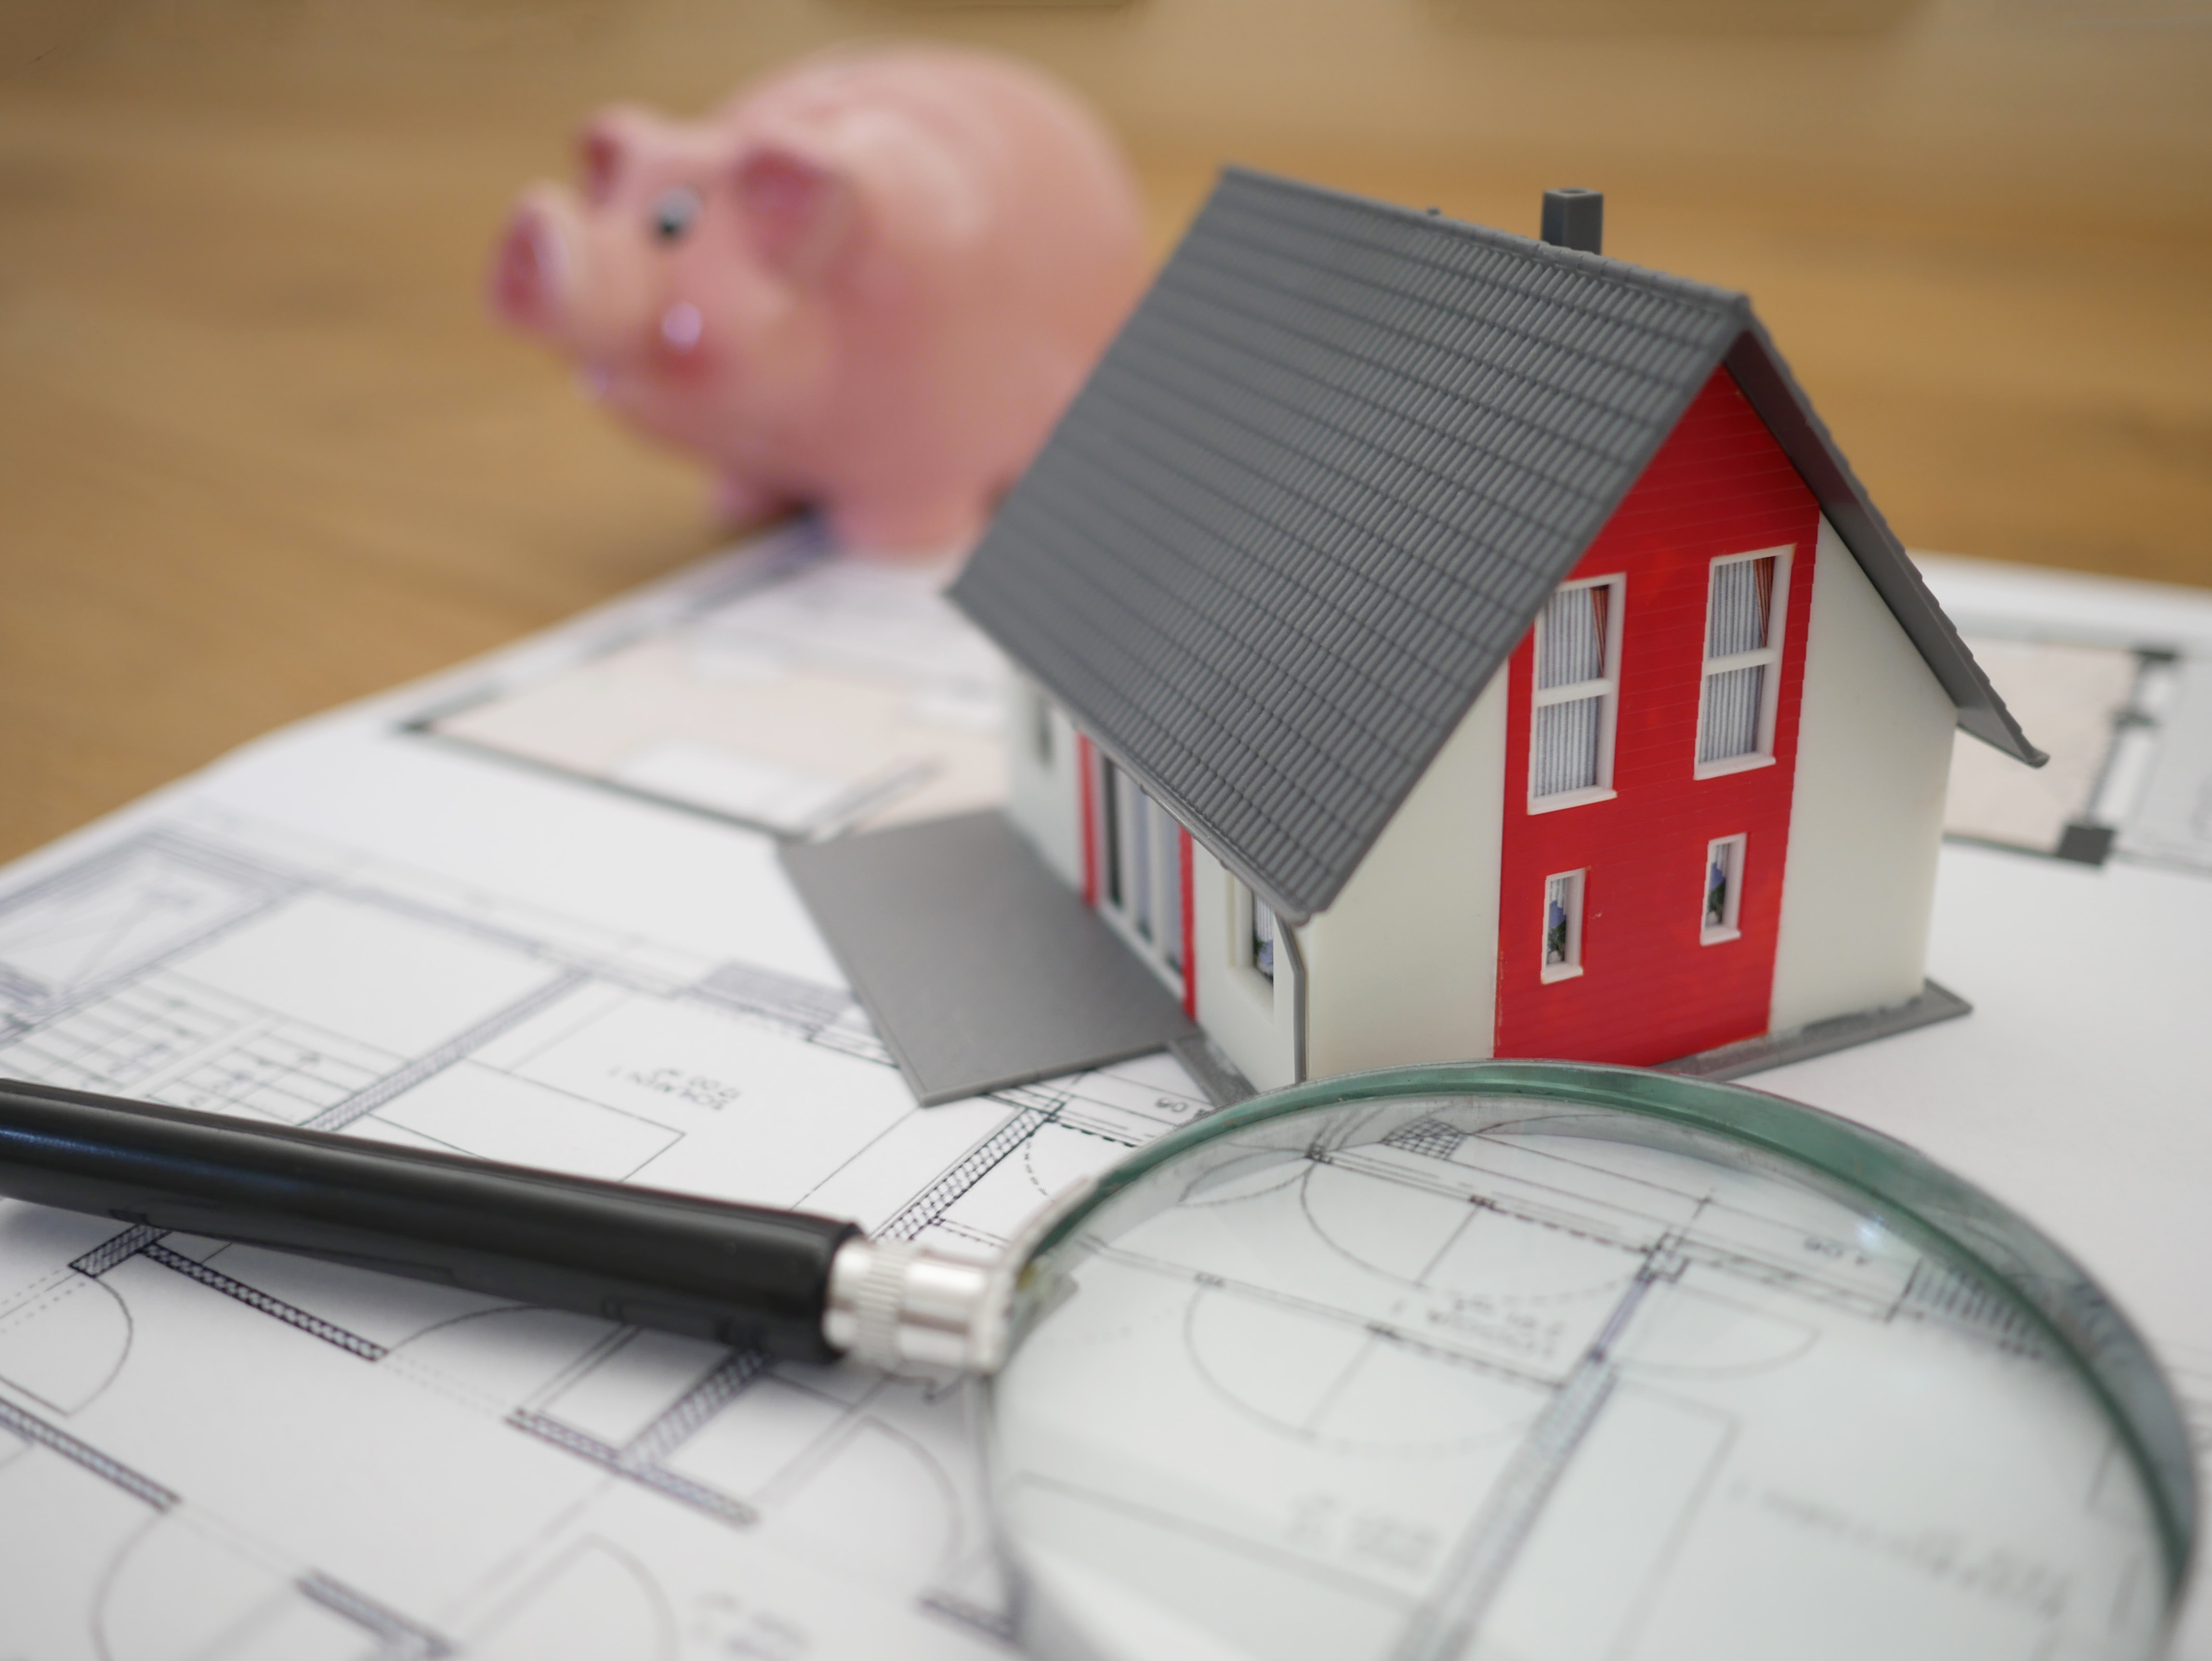
</div>


## **INTRODUCTION**
**The United States is the largest economy in the world. Based on realtrends article, real estate accounts for 16.9% of US's GDP on 2021 which is considered a major GDP contributor. The following analysis aims to provide viewers with real estate insights that may facilitate general understanding and potential investment decisions through market trends and factors influencing the real estate market.**

In [1]:
# Importing Libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Importing data 
raw_real_estate = pd.read_csv("realtor_data.csv")

### DATA CLEANING AND VALIDATION 
**This stage contains initial exploration of the real estate dataset. It involves identifying missing values, reformating certain columns for analysis purpose, filtering out duplicated datas and keep the data required for analysis purpose.**

In [3]:
# Initial Exploration
# Identifying the shape of the dataset 
shape = raw_real_estate.shape
# identifying the data types of all the columns
data_types = raw_real_estate.dtypes

In [12]:
# Identifying the number of missing values in each the columns 
missing_values = raw_real_estate.isna().sum().reset_index()
missing_values.columns = ['Column_Names', 'Missing_value_Count']
display(missing_values)

,Column_Names,Missing_value_Count
0,status,0
1,price,71
2,bed,131703
3,bath,115192
4,acre_lot,273623
5,full_address,0
6,street,2138
7,city,74
8,state,0
9,zip_code,205


In [48]:
# Changing the date column into "date" data type 
raw_real_estate['sold_date'] = pd.to_datetime(raw_real_estate['sold_date'], format = '%Y-%m-%d')

In [49]:
# Removing rows with missing values in certain columns
raw_real_estate = raw_real_estate.dropna(subset = ['price', 'bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'sold_date'])

In [50]:
## Filtering for datas for years between year 2000 and 2022 (ordered)

# Finding the max and min dates in the dataset 
raw_real_estate['sold_date'].agg(['min', 'max'])

# Filtering the date from the range of dates in order
raw_real_estate = raw_real_estate[(raw_real_estate['sold_date'] >= '2000-01-01')
                     & (raw_real_estate['sold_date'] <= '2022-12-31')].sort_values("sold_date")

# Filtering the columns needed for further analysis
final_real_estate = raw_real_estate.loc[:, (raw_real_estate.columns != 'street') ]

# Removing Duplicate Values 
final_real_estate = final_real_estate.drop_duplicates(subset = ["full_address", "sold_date"])

# Reformating the price column 
final_real_estate['price'] = final_real_estate['price']/1000




### ANALYSIS STAGE 

### 1A. Identifying total real estate sales volumes from year 2000 to 2022
**A usual business cycle can be identified in the time series plot below where the peaks occured at 2005 and 2017 and the downturn at 2000, 2011 and 2022. The downturn occured at 2011 maybe considered weak recoveries from the 2008 global financial crisis and 2022 downturn maybe caused by the covid pandemic and the rise of interest rates.**

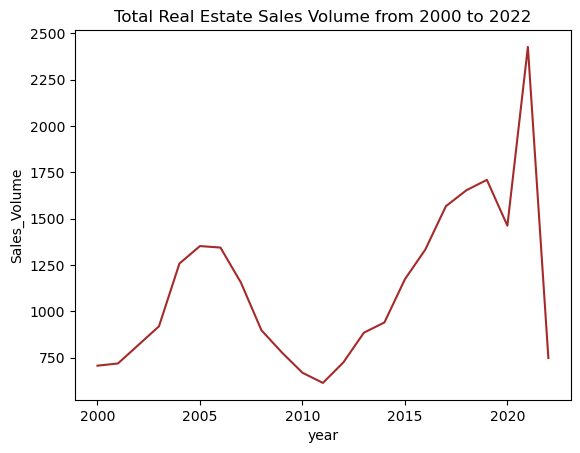

In [51]:
#  Create the column called "year"
final_real_estate['year'] = pd.DatetimeIndex(final_real_estate['sold_date']).year

# final_real_estate['price'].agg(['min', 'max'])
# Re format the price column in "thousands"
# Renaming the columns 
final_real_estate.rename(columns = {"price": "Sale_Price_Thousands"}, inplace = True) 


# Finding the sum of real estate sales Volume in each of the year 
General_Sales_Volume = final_real_estate['year'].value_counts().sort_index()

# Plotting the Real Estate Sales Volume over the years 
Sales_Volume_Plot = General_Sales_Volume.plot(title = "Total Real Estate Sales Volume from 2000 to 2022", 
                                              xlabel = "year", ylabel = "Sales_Volume", kind = "line")

###  1B. Identifying total real estate sales value from year 2000 to 2022
**The real estate sales value time series plot below shows a similar pattern as the sales volume time series plot. This may be due to the large value each real estate carries which makes changes in real estate sales very obvious.**

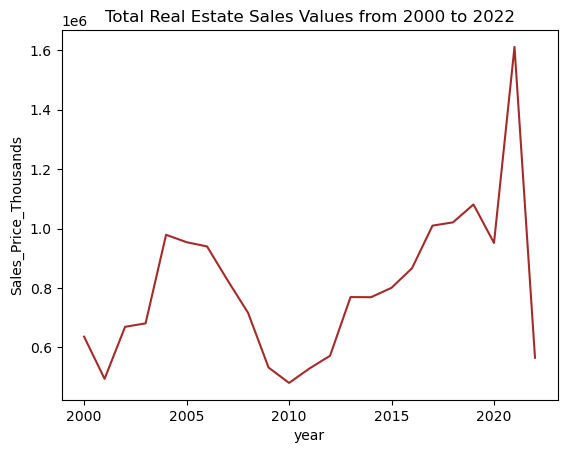

In [52]:
# Finding the sum of real estate sales Value in each of the year 
General_Sales_Values = pd.DataFrame(final_real_estate.groupby('year')['Sale_Price_Thousands'].sum())
Sales_Revenue_Plot = General_Sales_Values.plot(title = "Total Real Estate Sales Values from 2000 to 2022", 
                                               ylabel = "Sales_Price_Thousands", kind = "line", legend = False)

#Sales_Values_Plot = sns.relplot(x = "year", y = "Sale_Price_Thousands", data = General_Sales_Values, kind = "line")
#Sales_Values_Plot.fig.suptitle("Total Real Estate Sale Price from 2000 to 2022", y = 1)
#plt.show()

### 2A. Identifying the Sales Volume of the top 5 states 
**New Jersey has the highest Real Estate sales volume across 22 years while New York is slightly ahead of Pennsylvania.**

Text(0.5, 1.0, 'Top 5 US States Real Estate Sales Volume')

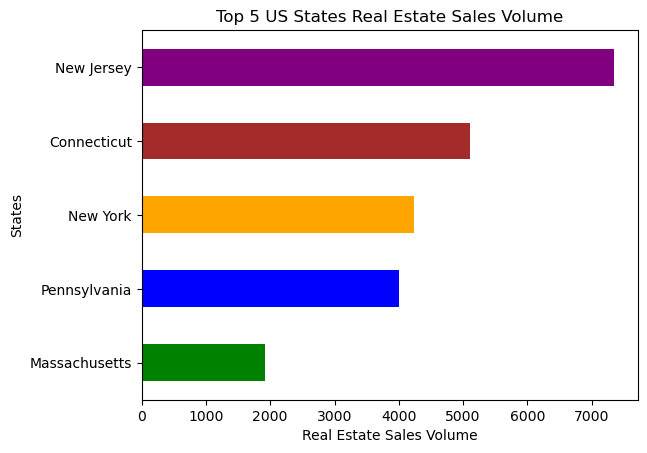

In [53]:
#2. Identifying the sales volume based on states 

# Identifying the number of states available in the US
final_real_estate['state'].nunique()

# Identifying the top 3 states in terms of real estate sales volume
final_real_estate['state'].value_counts().sort_values().tail(5).plot(kind = 'barh', 
                                                                     color = ['Green', 'Blue', 'Orange', 'Brown', 'Purple'])
plt.ylabel("States")
plt.xlabel("Real Estate Sales Volume")
plt.title("Top 5 US States Real Estate Sales Volume")

### 2B. Identifying the sales volume of the top 5 US states over the years
**New Jersey has the highest Real Estate sales volume each year for 22 years while the New York state has fallen behind Pennsylvania in recent years. Furthermore, Massachusetts have the least variation and lowest real estate sales for the past 12 years.**

Text(0.5, 1, 'Top 5 States Real Estate Sales Volume from year 2000 to 2022')

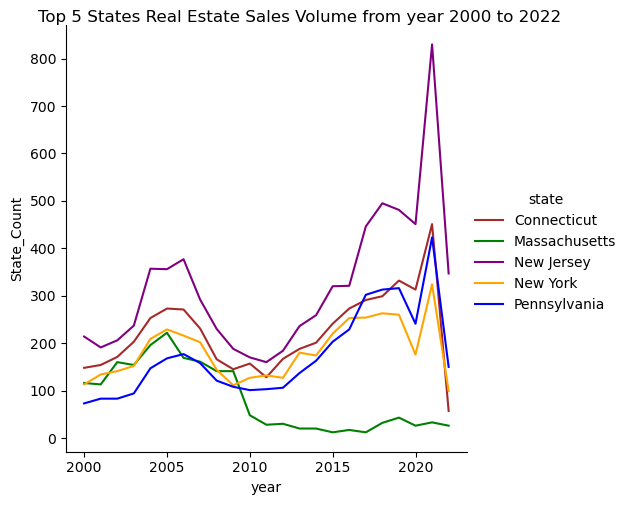

In [54]:
# Identifying the real estate sales volume in the top 5 states over the years 

# Filter out datas that only contains the top 5 states in terms of volume 
top_5_states = final_real_estate[final_real_estate.state.isin(["New Jersey", "Connecticut", "New York", "Pennsylvania", "Massachusetts"])]
top_5_states_sales_volume = pd.DataFrame(top_5_states.groupby(['year', 'state']).size()).rename(columns = {0: "State_Count"})

# Plotting the 
Palette = ["Brown", "Green", "Purple", "Orange", "Blue"]
sns.set_palette(Palette)
top_5_states_sales_volume = sns.relplot(x = "year", y = "State_Count", 
                                        data = top_5_states_sales_volume, kind = "line", hue = "state")
top_5_states_sales_volume.fig.suptitle("Top 5 States Real Estate Sales Volume from year 2000 to 2022", y = 1)

### 2C. Identifying the sales value of the top 5 US states 
**The top 5 US states for sales volume and sales value are the same, however, the New York state has taken the first position having the most real estate sales value for the past 22 years.**

Text(0.5, 1.0, 'Top 5 US States Real Estate Sales Value')

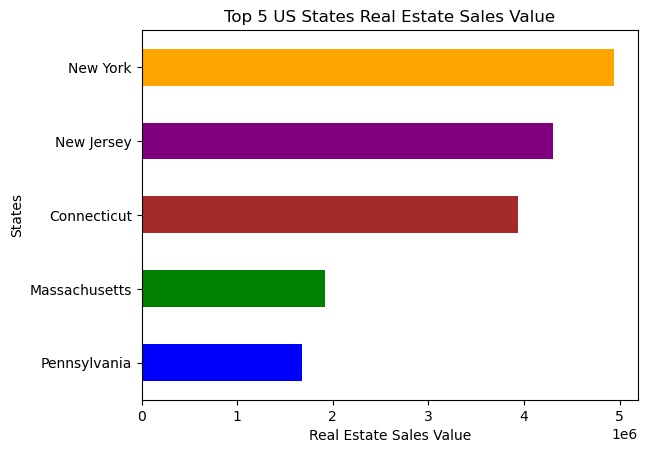

In [55]:
#2b Identifying the top 5 states based Sale_Price_Thousandson real estate sales value
final_real_estate.groupby('state')['Sale_Price_Thousands'].sum().sort_values().tail(5).plot(kind = "barh", 
                                                color = ['Blue', 'Green', 'Brown', 'Purple', "Orange"])
plt.xlabel("Real Estate Sales Value")
plt.ylabel("States")
plt.title("Top 5 US States Real Estate Sales Value")

### 3A Identify the most expensive real estate sold in each year


In [56]:
#3 Identify the Information of the Most expensive real estate in each year.
Most_Expensive_Real_Estate = top_5_states.loc[top_5_states.groupby('year')['Sale_Price_Thousands'].idxmax()]
display(Most_Expensive_Real_Estate)


,status,Sale_Price_Thousands,bed,bath,acre_lot,full_address,city,state,zip_code,house_size,sold_date,year
922453,for_sale,39000.0,8.0,13.0,8.23,"555 Lake Ave, Greenwich, CT, 06830",Greenwich,Connecticut,6830.0,18954.0,2000-07-17,2000
649077,for_sale,13950.0,10.0,14.0,16.93,"770 Godfrey Rd, Villanova, PA, 19085",Villanova,Pennsylvania,19085.0,19000.0,2001-03-07,2001
560341,for_sale,32500.0,8.0,8.0,0.05,"20 E 73rd St, New York, NY, 10021",New York,New York,10021.0,11371.0,2002-03-21,2002
409975,for_sale,60000.0,9.0,10.0,400.00,"450 Brickyard Rd, Woodstock, CT, 06281",Woodstock,Connecticut,6281.0,18777.0,2003-08-28,2003
495469,for_sale,25000.0,6.0,11.0,0.07,"70 Broad St, New York City, NY, 10004",New York City,New York,10004.0,19478.0,2004-07-12,2004
204657,for_sale,15000.0,6.0,6.0,4.50,"2 Squibnocket Rd, Chilmark, MA, 02535",Chilmark,Massachusetts,2535.0,4706.0,2005-10-04,2005
734864,for_sale,18500.0,3.0,5.0,1.94,"151 E 58th St Ph 55W, New York City, NY, 10022",New York City,New York,10022.0,4500.0,2006-07-11,2006
743986,for_sale,20500.0,4.0,5.0,1.33,"New York City, NY, 10023",New York City,New York,10023.0,3333.0,2007-12-20,2007
743290,for_sale,50000.0,6.0,8.0,0.22,"995 5th Ave Unit Ph, New York City, NY, 10028",New York City,New York,10028.0,6891.0,2008-09-12,2008
64850,for_sale,15000.0,8.0,10.0,157.00,"47 White Bridge Rd, Chatham, NY, 12136",Chatham,New York,12136.0,14058.0,2009-10-20,2009


### 3B. At which states are the most expensive real estate sold located in? 
**Out of 22 years, the New York state sold the most expensive real estate in the US for 12 years, outbeating other states by at least 50%. Moreover, this may mean that real estates in New York state tends to appreciate more and/or has higher value due to higher living standards.**

Text(0.5, 1.0, 'Most Expensive Real Estate Count in the Top 5 States')

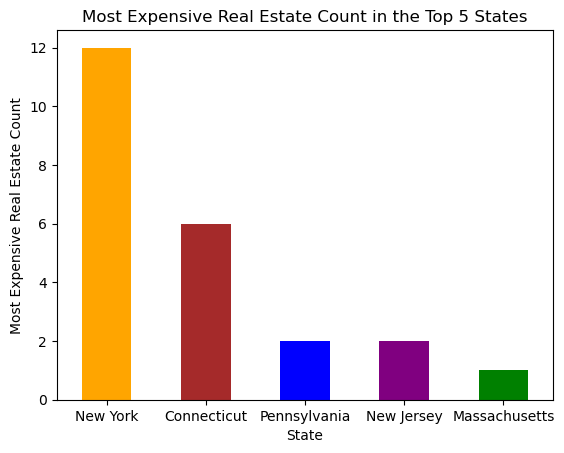

In [57]:
#3b At which states are the most expensive real estates sold located in? 
plot = Most_Expensive_Real_Estate['state'].value_counts().plot(kind = "bar", 
                                                                color = ['Orange', 'Brown', 'Blue', 'Purple', "Green"])

plt.xticks(rotation = 0)
plt.xlabel("State")
plt.ylabel("Most Expensive Real Estate Count")
plt.title("Most Expensive Real Estate Count in the Top 5 States")


### 4A. Identifying the relationships between number of bathrooms, bedrooms, acre_lot and house size to the sale price.
**From the correlation matrix shown below, turns out number of bathrooms has the strongest positive linear relationship to the sale price compared to other variables. It may be unexpected that the size of the real estate is not the variable with the strongest linear relationship. However, its important to point out that there are other factors that influences real estate prices such as the environment, location choice and the ability of the property to demand higher rents which is influenced by the purpose of using the land.**

In [58]:
# 4 Identify the relationship between no of bath and bed to the final sale price. 
columns = ['Sale_Price_Thousands', 'bath', 'bed', 'acre_lot', 'house_size']
subset = top_5_states[columns]

print(display(subset.corr()))

,Sale_Price_Thousands,bath,bed,acre_lot,house_size
Sale_Price_Thousands,1.000000,0.554682,0.296698,0.008957,0.431435
bath,0.554682,1.000000,0.618261,0.007481,0.600317
bed,0.296698,0.618261,1.000000,-0.000537,0.465522
acre_lot,0.008957,0.007481,-0.000537,1.000000,0.004948
house_size,0.431435,0.600317,0.465522,0.004948,1.000000


None


### 4B. Visualizing the relationships between the number of bathrooms and acre_lot 
**It can be observed that as the number of bathroom increases in a property, the ceiling of the real estate price tends to increase, but this trend starts to diminish after 5 bathrooms, ignoring the availability of outliers. This shows relationship between the number of bathrooms and sale price is not linear after certain number of bathrooms have been reached. Other factors may play a more important role once bathroom number reaches 5.**

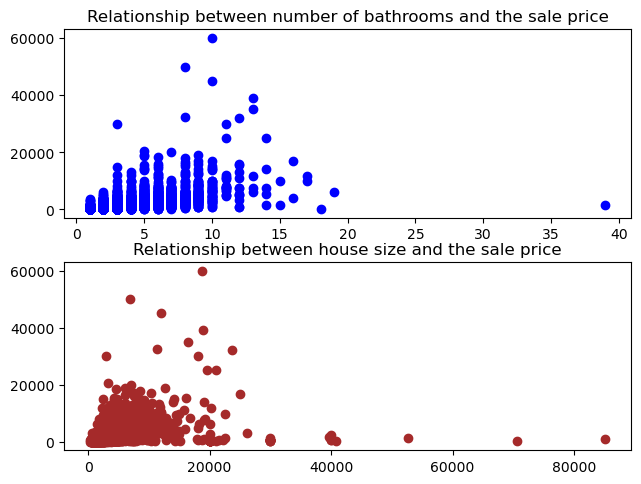

In [59]:
# Setting the structure and layout
figure, axis = plt.subplots(2)
figure.tight_layout()

# Relationship between the x variables and the y variables
axis[0].scatter(top_5_states["bath"], top_5_states['Sale_Price_Thousands'], color = "Blue")
axis[0].set_title("Relationship between number of bathrooms and the sale price")
axis[1].scatter(top_5_states["house_size"], top_5_states['Sale_Price_Thousands'])
axis[1].set_title("Relationship between house size and the sale price")
plt.show()

### 5. Explore the distribution of the sale price of the top 5 US states
**Based on the the distribution below, the real estates price is heavily right skewed towards the hundred of thousands value range. There are only a few real estates valued above 1 million.**

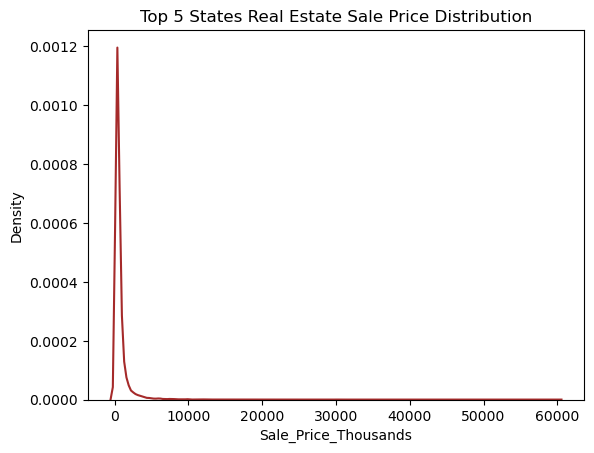

In [60]:
# 5 Explore the distribution of the sale price of the 5 states 
# Overall we can observe that the distribution of real estate sale price is strongly positively skewed
Sale_Price = top_5_states['Sale_Price_Thousands']
Sale_Price_Distribution = sns.kdeplot(Sale_Price).set(title ='Top 5 States Real Estate Sale Price Distribution')

### 6. What type of house is the most popular over the years? (Based on the number of bathrooms and bedrooms)
**Based on the table below, a 2 bedroom and 3 bathroom property is the most popular real estate in terms of sales volume every year for the past 22 years. This maybe due to the fact that this is the average family size in the US which drives the most demand for this type of property structure.**

In [61]:
# 6 look into what type of house is most popular (based on number of bathroom and bedroom) (Over the years)

# Value_counts() would remove the column names, but by reindexing, we can set the column names
raw_top_house = top_5_states.groupby('year')[['bed', 'bath']].value_counts().reset_index()
raw_top_house.columns = ['year', 'bed', ' bath', 'counts']

# Generating the index to identify the max counts for each year (idx is in boolean)
idx = raw_top_house.groupby(['year'])['counts'].transform(max) == raw_top_house['counts']
# Will only return rows that matches True
raw_top_house[idx]

,year,bed,bath,counts
0,2000,3.0,2.0,125
51,2001,3.0,2.0,131
101,2002,3.0,2.0,143
154,2003,3.0,2.0,177
201,2004,3.0,2.0,207
257,2005,3.0,2.0,230
316,2006,3.0,2.0,225
375,2007,3.0,2.0,202
429,2008,3.0,2.0,150
485,2009,3.0,2.0,149


# **CONCLUSION**
**The top 5 States for real estate sales in the US are New Jersey, Connecticut, New York, Pennsylvania and Massachusetts for the past 22 years. If this trend continues, the real estates in these states may be potential investment options as the market is quite active, thus more liquid. However, real estates in these states may be potentially more expensive, but at the same time these states may have more employment opportunities. If quality of life such as pollution rates are of concern, other less crowded states maybe better choices for living.
Moreover, real estate values are mainly driven by value generating drivers such as location and the property's ability to generate rent rather than just real estate size.
Furthermore, a 3 bedroom and 2 bathroom real estate is the most demanded real estate for the past 22 years and if this trend continues to the future, this type of real estate would be a safe and great investment option.**